Minimum time maneuver for a crane. A crane manipulates a load with mass m > 0
in two dimensions using two cables attached to the load. The cables maintain angles
±θ with respect to vertical, as shown below.


The (scalar) tensions Tleft and Tright in the two cables are independently controllable,
from 0 up to a given maximum tension T max. The total force on the load is

F = Tleft  − sin θ
cos θ

+ Tright  sin θ
cos θ

+ mg,

where g = (0, −9.8) is the acceleration due to gravity. The acceleration of the load is
then F/m.
We approximate the motion of the load using

pi+1 = pi + hvi, vi+1 = vi + (h/m)Fi, i = 1, 2, . . . ,

where pi ∈ R2 is the position of the load, vi ∈ R2 is the velocity of the load, and
Fi ∈ R2 is the force on the load, at time t = ih. Here h > 0 is a small (given) time
step.
The goal is to move the load, which is initially at rest at position pinit to the position
pdes, also at rest, in minimum time. In other words, we seek the smallest k for which

p1 = pinit, pk = pdes, v1 = vk = (0, 0)
is possible, subject to the constraints described above.
(a) Explain how to solve this problem using convex (or quasiconvex) optimization.
(b) Carry out the method of part (a) for the problem instance with

m = 0.1, θ = 15◦

, T max = 2, pinit = (0, 0), pdes = (10, 2),
with time step h = 0.1. Report the minimum time k⋆. Plot the tensions versus
time, and the load trajectory, i.e., the points p1, . . . , pk in R2

. Does the load move
along the line segment between pinit and pdes (i.e., the shortest path from pinit and
pdes)? Comment briefly.



NAME-**ANNU**

ROLL_NO-**EE21RESCH01010**

**CONVEX LAB 10.2**

In [6]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [7]:
#data given to us

angle = 15*3.141592/180.0
M = np.matrix([[-np.sin(angle), np.sin(angle)],
[np.cos(angle), np.cos(angle)]])
Tens_max = 2.0 # Max tension that each cable can apply (kNewtons)
m = 0.1 # Mass of the load (Metric tons)-given in question

pos_init = [0,0] # Init position (m)
pos_des = [10,2] # Desired position (m)
h_step = 0.1 # Simulation timestep (s)
T_feasible = 0
p_feasible = 0


question part 1

Nature of constraints:All the constraints defined for this problem are linear in nature.

Nature of objective:Here objective is to minimize K value. i.e The goal is to move the load, which is initially at rest at position pinit to the position
pdes, also at rest, in minimum time.

So,This objective cannot take fractional values and thus it is **Not CONVEX** in nature.

So,this problem is **QUASI CONVEX**, as constraints are linear in nature and objective is not convex.


**SOLVING APPROACH**:Can be solved using Sublevel set intuition:Bisection algorithm

taking any appropriate region for k ,then checking feasibility check for upcoming intervals.

The problem as stated is quasiconvex: To see if k
⋆ ≤ k, we simply check if there
exists a set of variables that satisfy the constraints, together with pk = p
des
,
vk = 0.
For a given value for k, we can solve a convex feasibility problem (in fact, an
LP) to determine if such a trajectory exists. Let T ∈ R
2×k−1
be a matrix of the
tensions, so that T1i
, T2i are T
left
, T
right at time ih, respectively. Then the force
applied to the load at time ih be Fi = MTi + mg where
M =

− sin θ sin θ
cos θ cos θ

.
To find a feasible trajectory, we solve the LP
minimize 0
subject to 0  T  T
max
,
vi+1 = vi + (h/m)Fi
, i = 1, . . . , k − 1,
pi+1 = pi + hvi
, i = 1, . . . , k − 1,
p1 = p
init, pk = p
des, v1 = vk = 0.
We can then find the minimum time by finding the smallest k for which the above
problem is feasible. This can be done by bisection, or by simply increasing k until
the problem becomes feasible.


Question part 2

reporting minimum K value which is 34.

 We find that k
optimal = 34, corresponding to t = 3.4 seconds. From the trajectory plot,
we see that the load does not travel along the line between the initial and final
positions. Since the load must cross a large horizontal distance, we maximize the
horizontal force which is accomplished by setting the tension in the right cable to
T
max. As the tension produces a force along the line of the cable, the load rises
up in addition to accelerating in the horizontal direction.

Code is shown below-

QuasiConvex problem is minimize 0.0
subject to position[0:2, 1:33] == position[0:2, 0:32] + Promote(0.1, (2, 32)) * velocity[0:2, 0:32]
           0.0 <= tension
           tension <= 2.0
           position[0:2, 0] == [0. 0.]
           position[0:2, 32] == [10.  2.]
           velocity[0:2, 0] == 0.0
           velocity[0:2, 32] == 0.0
           velocity[0:2, 1:33] == velocity[0:2, 0:32] + Promote(1.0, (2, 32)) * ([[-0.25881899  0.25881899]
 [ 0.96592584  0.96592584]] * tension + [[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98
  -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98
  -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98 -0.98]])


Here objective is to minimize K value. i.e The goal is to move the load, which is initially at rest at position pi

Text(0.5, 0, 'time')

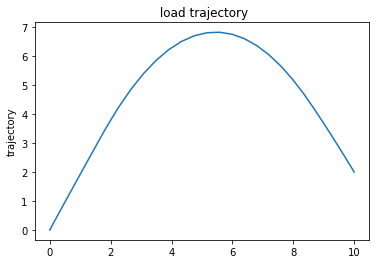

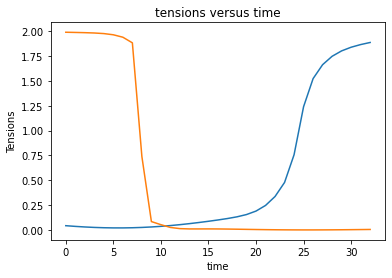

In [9]:
#Bisection algorithm
lower_bound = 10 # assuming for bisection algo
upper_bound = 50 # assuming for bisection algo

for i in range(lower_bound,upper_bound):
   #initialising with mid point
   #Here objective is to minimize K value. i.e The goal is to move the load, which is initially at rest at position pinit to the position pdes, also at rest, in minimum time.
   k = (upper_bound+lower_bound)/2
   k=int(k)
   
   #cvxpy variable declaration
   Tens = cp.Variable((2,(k-1)),name="tension")
   velocity = cp.Variable((2,k),name="velocity")
   pos = cp.Variable((2,k),name="position")

   #constraints declaration
   g=np.zeros([2,k-1])
   g[0,:]=[0 for i in range (k-1)]
   g[1,:]=[-9.8 for i in range (k-1)]
   Force = M*Tens + m*g
   constraints=[]
   func1=pos[:,0:k-1] + h_step*velocity[:,0:k-1]
   #constraints on position expression
   constraints += [pos[:,1:k] == func1]
   #constraints on maximum tension
   constraints += [Tens>=0, Tens <= Tens_max]
   #constraints on position
   constraints += [pos[:,0] == pos_init, pos[:,k-1] == pos_des]
   #constraints on velocity
   constraints += [velocity[:,0] == 0, velocity[:,k-1] == 0]
   #constraints on velocity expression
   func2=velocity[:,0:k-1] + (h_step/m)*Force
   constraints += [velocity[:,1:k] == func2]

   #Objective declaration
   objective=cp.Minimize(0)
   prob = cp.Problem(objective,constraints)
   optimum = prob.solve()

   #checking with feasibility

   if optimum == 0:
     upper_bound = k
     T_feasible = Tens.value
     p_feasible = pos.value
   else: 
     lower_bound = k

k = upper_bound;

print("QuasiConvex problem is",prob)
print("\n")
print("Here objective is to minimize K value. i.e The goal is to move the load, which is initially at rest at position pinit to the position pdes, also at rest, in minimum time.")
print("minimum k value is",k)

#Load trajectory grapgh
plt.figure(1)
plt.plot(p_feasible[0,:].T,p_feasible[1,:].T)
plt.title(" load trajectory")
plt.ylabel("trajectory")

#Tension grapgh
plt.figure(2)
plt.plot(T_feasible.T)
plt.title("tensions versus time")
plt.ylabel("Tensions")
plt.xlabel("time")
